In [26]:
from src.modeling import *

%reload_ext autoreload
%autoreload 2

In [27]:
train_df = pd.read_pickle('data/KS_train_data.pkl')

train_df = train_df.set_index('id', drop = True)

test_df = pd.read_pickle('data/KS_test_data.pkl')
test_df = test_df.set_index('id', drop = True)

X_train = train_df.drop(columns = ['state', 'deadline', 'launched_at', 'converted_pledged_amount', 'spotlight', 'backers_count'])
y_train = train_df.state

X_test = test_df.drop(columns = ['state', 'deadline', 'launched_at', 'converted_pledged_amount', 'spotlight', 'backers_count'])
y_test = test_df.state

In [28]:
X_train

,country,currency,disable_communication,goal,is_starrable,staff_pick,category_parent_name,start_month,end_month,blurb_len
id,,,,,,,,,,
134941324,21,13,False,20000.0,False,True,7,1,2,126
390265414,9,5,False,6000.0,False,False,9,6,7,111
176386802,21,13,False,8000.0,False,False,1,7,9,38
1472199672,21,13,False,3000.0,False,False,8,5,5,32
53870075,21,13,False,50000.0,False,False,6,1,3,45
...,...,...,...,...,...,...,...,...,...,...
880302182,16,4,False,5000.0,False,False,8,7,8,107
1397647515,3,1,False,1000.0,False,False,10,1,3,134
973696945,21,13,False,3000.0,False,False,0,7,8,125


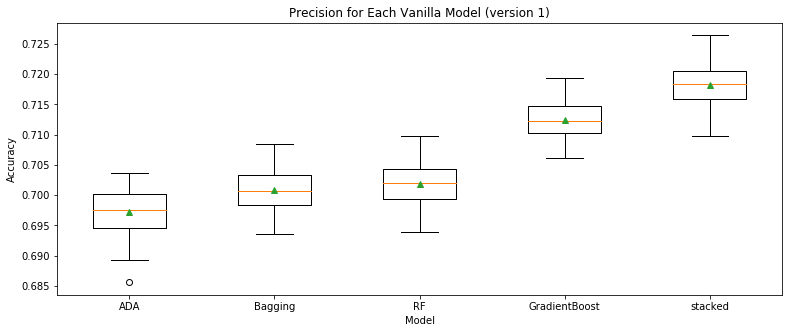

In [29]:
result_dict = pickle.load(open('models/VanillaResults_4.p', 'rb'))

results = [i[1] for i in result_dict.items()]
model_names = [i for i in result_dict.keys()]
plot_model_results(results, model_names, 'models/VanillaResults_4', figure_title = 'Precision for Each Vanilla Model (version 1)', 
                   figsize = (13, 5))

In [30]:
GB_Params_0 = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate' : [0.1, 0.5],
    'n_estimators' : [50, 100, 1000],
    'subsample' : [0.5, 1.0, 1.5],
    'criterion' : ['friedman_mse', 'mse', 'mae'],
    'min_samples_split' : [2, 10, 50],
    'max_depth' : [3, 10],
    'random_state' : [6]
}

In [31]:
RF_Params_0 = {
    'n_estimators' : [50, 100, 200],
    'criterion' : ['gini' , 'entropy'],
    'max_depth' : [None, 10, 40],
    'min_samples_split' : [2, 10],
    'min_samples_leaf' : [1, 10],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'bootstrap' : [True, False], 
    'max_samples' : [None, 100]
}

In [ ]:
GB_grid = run_gridsearch(GradientBoostingClassifier(), 
                         X_train, y_train,
                         X_test, y_test,
                         GB_Params_0, verbose = 1)

pickle.dump(GB_grid, open('../models/GradientBoost_Grid_1.p', 'wb'))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  8.4min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 58.0min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 163.4min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 304.9min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed: 471.1min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed: 713.4min


In [ ]:
# RF_grid = run_gridsearch(GradientBoostingClassifier(), 
#                          X_train, y_train, 
#                          X_test, y_test,
#                          RF_Params_0, verbose = 1)

# pickle.dump(GB_grid, open('../models/RandomForest_Grid_1.p', 'wb'))